In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Assignment-1_Data.xlsx')
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df = df[:52206]
df.shape

(52206, 7)

## Apriori & Association Rules

In [4]:
df_use = df[['BillNo', 'Itemname']]
df_use.dropna(inplace = True)
df_use.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,BillNo,Itemname
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.


#### Group Invoices 

In [5]:
aggregation = df_use.groupby('BillNo')['Itemname'].apply(list)
aggregation = pd.DataFrame(aggregation)
aggregation.head()

,Itemname
BillNo,
536365,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA..."
536367,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO..."
536368,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS..."
536369,[BATH BUILDING BLOCK WORD]


In [6]:
transactions = list(aggregation['Itemname'])
transaction_products = list(set([item for transaction in transactions for item in transaction]))
transaction_products

['FRENCH BLUE METAL DOOR SIGN 1',
 'AMETHYST DROP EARRINGS W LONG BEADS',
 'CALENDAR PAPER CUT DESIGN',
 'BAKING MOULD EASTER EGG MILK CHOC',
 'SET OF 36 MUSHROOM PAPER DOILIES',
 'PINK PAISLEY CUSHION COVER',
 'RECIPE BOX WITH METAL HEART',
 'SWEETHEART CARRY-ALL BASKET',
 'SPOTS ON RED BOOKCOVER TAPE',
 'ASSTD DESIGN BUBBLE GUM RING',
 'VINTAGE KITCHEN PRINT VEGETABLES',
 'SET/6 BLACK BIRD T-LIGHT CANDLES',
 'WOODEN ADVENT CALENDAR RED',
 'WRAP PINK FAIRY CAKES',
 'VINTAGE CARAVAN GREETING CARD',
 'GLASS CHALICE BLUE SMALL',
 'EDWARDIAN PARASOL PINK',
 'PACK OF 72 SKULL CAKE CASES',
 'OCEAN SCENT CANDLE IN JEWELLED BOX',
 'VINTAGE UNION JACK CUSHION COVER',
 'MIRRORED DISCO BALL',
 'BLUE PAISLEY POCKET BOOK',
 'NUMBER TILE VINTAGE FONT 2',
 'FELT TOADSTOOL LARGE',
 'FANCY FONTS BIRTHDAY WRAP',
 'VINTAGE UNION JACK DOORSTOP',
 'FELT EGG COSY LADYBIRD',
 'RED POLKADOT COFFEE  MUG',
 'WOODEN OWLS LIGHT GARLAND',
 'STAR WOODEN CHRISTMAS DECORATION',
 'SMALL REGAL  SILVER CANDLEPOT',
 'ME

#### One-hot encoding transaction data

In [7]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items in transactions
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

# Print the one-hot encoded transaction dataset
onehot.tail()

,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,...,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,amazon,amazon sales,check,damages,faulty,found,"mouldy, thrown away.",reverse 21/5/10 adjustment
1897,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1899,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1900,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1901,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Support for each product

In [8]:
# Compute the support
support = onehot.mean()

# Print the support
support.sort_values(ascending = False)[:5]

WHITE HANGING HEART T-LIGHT HOLDER    0.149842
REGENCY CAKESTAND 3 TIER              0.110410
HAND WARMER BABUSHKA DESIGN           0.099369
HEART OF WICKER SMALL                 0.094637
SCOTTIE DOG HOT WATER BOTTLE          0.094111
dtype: float64

Here we have the top products that our clients bought the most.

Note, this doesn't access the quantity by purchase. If we analyse the quantity maybe we have different results.

Just to experience we will pick up the top 2 products in terms of purchase and verify what is their support.

In [9]:
onehot['WHITE HANGING HEART T-LIGHT HOLDER + REGENCY CAKESTAND 3 TIER'] = np.logical_and(onehot['WHITE HANGING HEART T-LIGHT HOLDER'], 
                                                                                         onehot['REGENCY CAKESTAND 3 TIER'])

support = onehot.mean()

support['WHITE HANGING HEART T-LIGHT HOLDER + REGENCY CAKESTAND 3 TIER']

0.02576235541535226

They are not related, means that we have two products that are not purchased together frequently.

### Confidence & Lift

#### Confidence

Confidence tels us from all purchases or product A which percentage contains B.

support(A&B) / support(B)

We will use the products,

- REGENCY CAKESTAND 3 TIER;
- HAND WARMER BABUSHKA DESIGN ;

In [10]:
onehot['WHITE HANGING HEART T-LIGHT HOLDER + HAND WARMER BABUSHKA DESIGN'] = np.logical_and(onehot['WHITE HANGING HEART T-LIGHT HOLDER'], onehot['HAND WARMER BABUSHKA DESIGN'])
onehot.head()

,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,...,amazon,amazon sales,check,damages,faulty,found,"mouldy, thrown away.",reverse 21/5/10 adjustment,WHITE HANGING HEART T-LIGHT HOLDER + REGENCY CAKESTAND 3 TIER,WHITE HANGING HEART T-LIGHT HOLDER + HAND WARMER BABUSHKA DESIGN
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
#Compute means - support for products boughh together
support_Wh = onehot['WHITE HANGING HEART T-LIGHT HOLDER + HAND WARMER BABUSHKA DESIGN'].mean()

#Compute means - support for products in total purchases
support_W = onehot['WHITE HANGING HEART T-LIGHT HOLDER'].mean()

support_H = onehot['HAND WARMER BABUSHKA DESIGN'].mean()

confidence_W = support_Wh / support_W

confidence_H = support_Wh / support_H

print(f'Confidence for WHITE HANGING HEART T-LIGHT HOLDER is {np.round(confidence_W,3)}')
print(f'Confidence for HAND WARMER BABUSHKA DESIGN is {np.round(confidence_H,3)}')

Confidence for WHITE HANGING HEART T-LIGHT HOLDER is 0.196
Confidence for HAND WARMER BABUSHKA DESIGN is 0.296


This means that in 20% of the times that we buy WHITE HANGING HEART T-LIGHT HOLDER, we also buy HAND WARMER BABUSHKA DESIGN.

Hand Warmer shows a more confident way with 30% of purchases.

#### Lift

Lift is a metric where we measure the strength of one combination versus if the individual products of are bought individually.

If the values are above 1 means that these products are not randomly purchase and that they have a "relationship" between them, if they are below 1 their purchase together is random.

In [16]:
lift = support_Wh / (support_W * support_H)
print(f'The lift for both this products is {round(lift,2)} meaning that they are not randomly purchased')

The lift for both this products is 1.98 meaning that they are not randomly purchased


### Zhang's metric

Zhang's metric can be interperted as the following,

- Value of 1 means perfect association.

- Value of -1 means perfect dissociation.

Their interpretation is very similar to the pearson correlation in regression subjects.

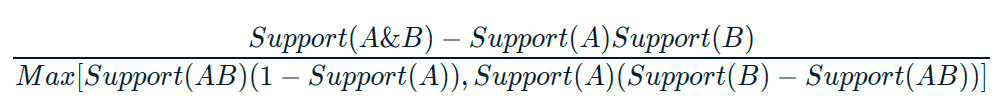

In [21]:
zhang = (support_Wh - support_W * support_H) / (max(support_Wh * (1 - support_W), support_W * ( support_H - support_Wh)))
print(f'The Zhang metric for both this products is {round(zhang,2)} meaning that they have a medium to strong association')

The Zhang metric for both this products is 0.58 meaning that they have a medium to strong association


### Apriori Algorythm

Apriori algorythm will be used to retain frequent sets and romove the not important ones.

If we have to study all the combinations this will not be feasible, so let's run apriori algorythm with a support threshold.

In [34]:
from mlxtend.frequent_patterns import apriori

#W will start with 0.04 as a threshold
frequent_itemsets = apriori(onehot, min_support = 0.04, max_len = 4, use_colnames = True)

frequent_itemsets.head()

,support,itemsets
0,0.050473,(6 RIBBONS RUSTIC CHARM)
1,0.041535,(60 CAKE CASES VINTAGE CHRISTMAS)
2,0.044164,(60 TEATIME FAIRY CAKE CASES)
3,0.066246,(ALARM CLOCK BAKELIKE GREEN)
4,0.044690,(ALARM CLOCK BAKELIKE PINK)


In [36]:
frequent_itemsets.shape

(89, 2)

We chose a threshold of 0.04 with a max_len of combinations of 4.

With apriori we can only use support for our metrics, if we want to check other metrics such as lift, we must use Association Rules.

Usually the community uses lift or Zhang to evaluate rules and we will do it too.

We will use frequent itemsets with support equal or bigger than 0.04 as we perform above.

In [57]:
# Import the association rules function
from mlxtend.frequent_patterns import association_rules

#Lift as the first one
rules_lift = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 0.01)

rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.058885,0.066246,0.044690,0.758929,11.456207,0.040789,3.873350
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.066246,0.058885,0.044690,0.674603,11.456207,0.040789,2.892206
2,(CHOCOLATE HOT WATER BOTTLE),(HOT WATER BOTTLE I AM SO POORLY),0.083596,0.059937,0.041009,0.490566,8.184707,0.035999,1.845309
3,(HOT WATER BOTTLE I AM SO POORLY),(CHOCOLATE HOT WATER BOTTLE),0.059937,0.083596,0.041009,0.684211,8.184707,0.035999,2.901945
4,(SCOTTIE DOG HOT WATER BOTTLE),(CHOCOLATE HOT WATER BOTTLE),0.094111,0.083596,0.043113,0.458101,5.479920,0.035245,1.691096
5,(CHOCOLATE HOT WATER BOTTLE),(SCOTTIE DOG HOT WATER BOTTLE),0.083596,0.094111,0.043113,0.515723,5.479920,0.035245,1.870601
6,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.077813,0.094637,0.047319,0.608108,6.425676,0.039955,2.310236
7,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.094637,0.077813,0.047319,0.500000,6.425676,0.039955,1.844374
8,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS),0.070978,0.088328,0.046267,0.651852,7.379894,0.039998,2.618632
9,(PAPER CHAIN KIT 50'S CHRISTMAS),(PAPER CHAIN KIT VINTAGE CHRISTMAS),0.088328,0.070978,0.046267,0.523810,7.379894,0.039998,1.950946


And to finalize ww will subset with thresholds that we consider important.

In [59]:
rules = rules_lift[(rules_lift['antecedent support'] > 0.07) & 
                   (rules_lift['consequent support'] > 0.07) & 
                   (rules_lift['lift'] > 5)]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(SCOTTIE DOG HOT WATER BOTTLE),(CHOCOLATE HOT WATER BOTTLE),0.094111,0.083596,0.043113,0.458101,5.479920,0.035245,1.691096
5,(CHOCOLATE HOT WATER BOTTLE),(SCOTTIE DOG HOT WATER BOTTLE),0.083596,0.094111,0.043113,0.515723,5.479920,0.035245,1.870601
6,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.077813,0.094637,0.047319,0.608108,6.425676,0.039955,2.310236
7,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.094637,0.077813,0.047319,0.500000,6.425676,0.039955,1.844374
8,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS),0.070978,0.088328,0.046267,0.651852,7.379894,0.039998,2.618632
9,(PAPER CHAIN KIT 50'S CHRISTMAS),(PAPER CHAIN KIT VINTAGE CHRISTMAS),0.088328,0.070978,0.046267,0.523810,7.379894,0.039998,1.950946
10,(SCOTTIE DOG HOT WATER BOTTLE),(RETROSPOT HEART HOT WATER BOTTLE),0.094111,0.076761,0.040484,0.430168,5.603964,0.033260,1.620193
11,(RETROSPOT HEART HOT WATER BOTTLE),(SCOTTIE DOG HOT WATER BOTTLE),0.076761,0.094111,0.040484,0.527397,5.603964,0.033260,1.916808


And Voilá we have the rules of product segmentation that we should use for promotions, disposition in supermarket or if online reccomendations.